# Image Recognition

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()



Instructions for updating:
non-resource variables are not supported in the long term


## Code

In [2]:
fashion_minst = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_minst.load_data()

In [3]:
class_names = ["T-shirts/tops","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

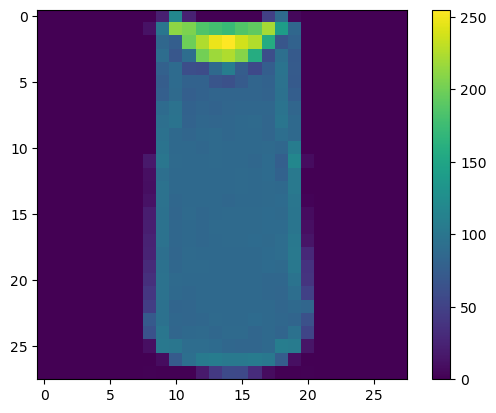

In [4]:
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)

In [5]:
k =np.array(train_images[2])

In [6]:
k.shape

(28, 28)

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

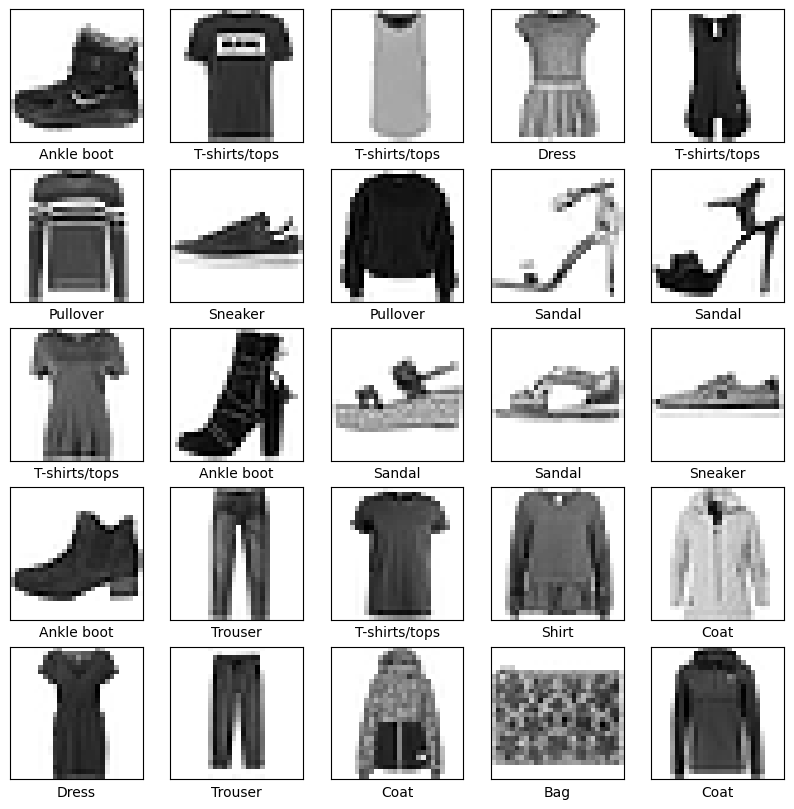

In [8]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [87]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500,'relu'),
    keras.layers.Dense(10)
])

In [88]:
model.compile(optimizer='adam',loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])



In [99]:
model.fit(train_images,train_labels,epochs=50)
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)


Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0774 - acc: 0.9710
Epoch 2/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0759 - acc: 0.9719
Epoch 3/50
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0747 - acc: 0.9720
Epoch 4/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0733 - acc: 0.9728
Epoch 5/50
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0724 - acc: 0.9731
Epoch 6/50
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0738 - acc: 0.9719
Epoch 7/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0708 - acc: 0.9735
Epoch 8/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0707 - acc: 0.9732
Epoch 9/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0690 - acc: 0.9740
Epoch 10/50
60000/60000 [==============================] - 

In [106]:
prob_model = keras.Sequential([model,keras.layers.Softmax()])
predictions = prob_model.predict(test_images)


In [107]:
np.argmax(predictions[0])

9

In [108]:
class_names[9]

'Ankle boot'

In [109]:
def plot_image(i,predictions_array,true_label,img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

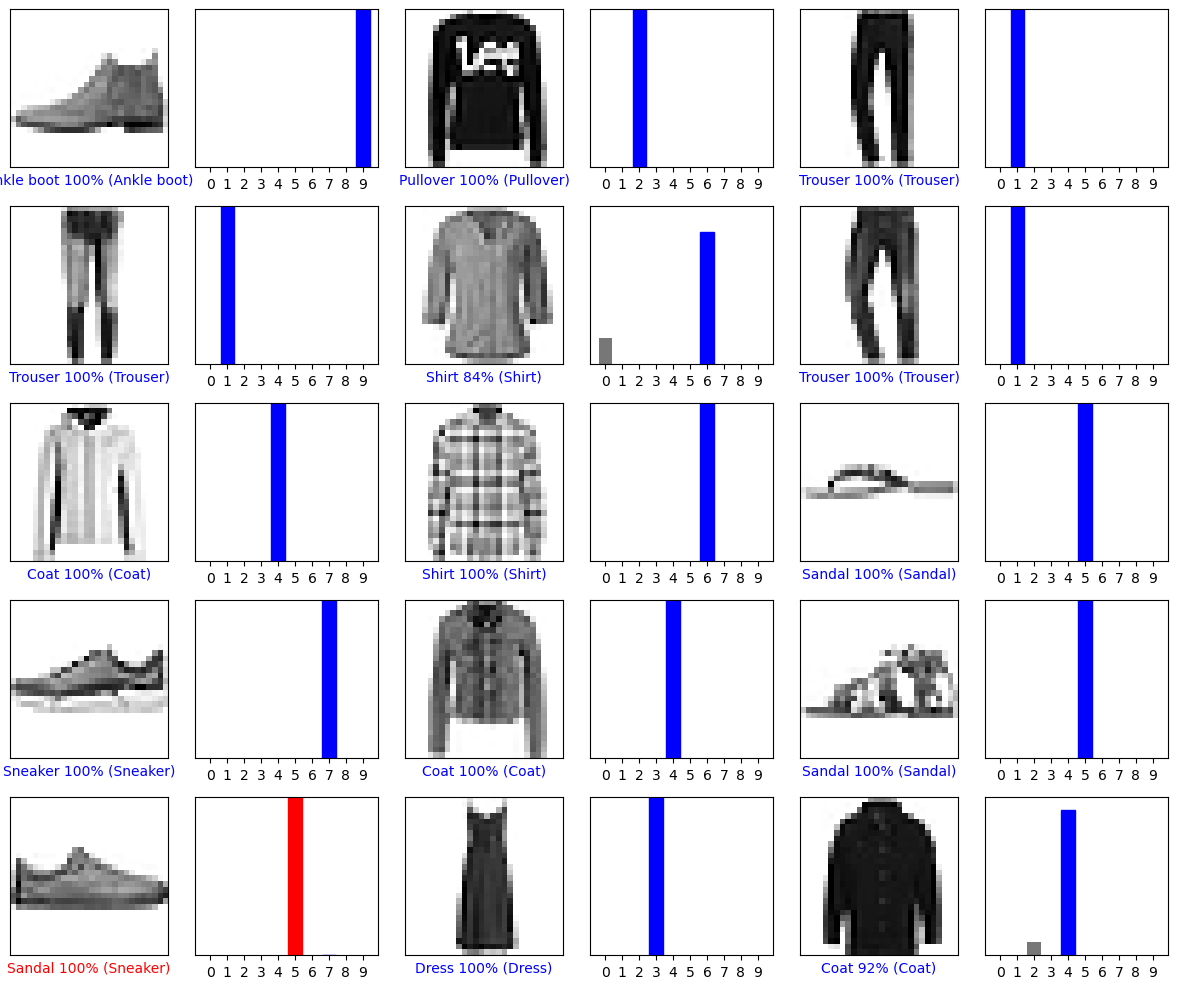

In [111]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()